**Oasis Infobyte**

**Batch - August Batch**

**Data Science Internship**

**Task 2: Unemployment Analysis in India**

**Intern Name: Soumalya Bhattacharyya**

**UNEMPLOYMENT ANALYSIS WITH PYTHON**

Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project

In [1]:
#Importing all the Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import plotly.express as px
import plotly.io as pio
pio.templates
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML
import datetime as dt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

C:\Users\User\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
#Importing the dataset
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [3]:
df.columns =["States", "Date", "Frequency", "Estimated Unemployment Rate", "Estimated Employed", "Estimated Labour Participation Rate", "Region", "Longitude", "Latitude"]

In [4]:
#View Dataset
df.head()

States         Date Frequency  Estimated Unemployment Rate  \
0  Andhra Pradesh   31-01-2020         M                         5.48   
1  Andhra Pradesh   29-02-2020         M                         5.83   
2  Andhra Pradesh   31-03-2020         M                         5.79   
3  Andhra Pradesh   30-04-2020         M                        20.51   
4  Andhra Pradesh   31-05-2020         M                        17.43   

   Estimated Employed  Estimated Labour Participation Rate Region  Longitude  \
0            16635535                                41.02  South    15.9129   
1            16545652                                40.90  South    15.9129   
2            15881197                                39.18  South    15.9129   
3            11336911                                33.10  South    15.9129   
4            12988845                                36.46  South    15.9129   

   Latitude  
0     79.74  
1     79.74  
2     79.74  
3     79.74  
4     79.74

In [5]:
#View Shape of Dataset
df.shape

(267, 9)

In [6]:
#View Size of Dataset
df.size

2403

**Exploratory Data Analysis**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               267 non-null    object 
 1   Date                                 267 non-null    object 
 2   Frequency                            267 non-null    object 
 3   Estimated Unemployment Rate          267 non-null    float64
 4   Estimated Employed                   267 non-null    int64  
 5   Estimated Labour Participation Rate  267 non-null    float64
 6   Region                               267 non-null    object 
 7   Longitude                            267 non-null    float64
 8   Latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [8]:
df.describe()

Estimated Unemployment Rate  Estimated Employed  \
count                   267.000000        2.670000e+02   
mean                     12.236929        1.396211e+07   
std                      10.803283        1.336632e+07   
min                       0.500000        1.175420e+05   
25%                       4.845000        2.838930e+06   
50%                       9.650000        9.732417e+06   
75%                      16.755000        2.187869e+07   
max                      75.850000        5.943376e+07   

       Estimated Labour Participation Rate   Longitude    Latitude  
count                           267.000000  267.000000  267.000000  
mean                             41.681573   22.826048   80.532425  
std                               7.845419    6.270731    5.831738  
min                              16.770000   10.850500   71.192400  
25%                              37.265000   18.112400   76.085600  
50%                              40.390000   23.610200   79.019300  
75%                              44.055000   27.278400   85.279900  
max                              69.690000   33.778200   92.937600

In [9]:
df.corr()

Estimated Unemployment Rate  \
Estimated Unemployment Rate                             1.000000   
Estimated Employed                                     -0.245176   
Estimated Labour Participation Rate                    -0.073540   
Longitude                                               0.149976   
Latitude                                               -0.023976   

                                     Estimated Employed  \
Estimated Unemployment Rate                   -0.245176   
Estimated Employed                             1.000000   
Estimated Labour Participation Rate           -0.047948   
Longitude                                     -0.113664   
Latitude                                      -0.119321   

                                     Estimated Labour Participation Rate  \
Estimated Unemployment Rate                                    -0.073540   
Estimated Employed                                             -0.047948   
Estimated Labour Participation Rate                             1.000000   
Longitude                                                       0.080372   
Latitude                                                        0.397836   

                                     Longitude  Latitude  
Estimated Unemployment Rate           0.149976 -0.023976  
Estimated Employed                   -0.113664 -0.119321  
Estimated Labour Participation Rate   0.080372  0.397836  
Longitude                             1.000000  0.125895  
Latitude                              0.125895  1.000000

In [10]:
df.columns

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region',
       'Longitude', 'Latitude'],
      dtype='object')

In [11]:
unemployment_df = df[['States','Region','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']]
unemployment = unemployment_df.groupby(['Region','States'])['Estimated Unemployment Rate'].mean().reset_index()
unemployment

Region            States  Estimated Unemployment Rate
0        East             Bihar                    19.471000
1        East         Jharkhand                    19.539000
2        East            Odisha                     6.462000
3        East       West Bengal                    10.192000
4       North             Delhi                    18.414000
5       North           Haryana                    27.477000
6       North  Himachal Pradesh                    16.065000
7       North   Jammu & Kashmir                    16.477778
8       North            Punjab                    11.981000
9       North         Rajasthan                    15.868000
10      North     Uttar Pradesh                     9.737000
11      North       Uttarakhand                    11.156000
12  Northeast             Assam                     4.856000
13  Northeast         Meghalaya                     3.866000
14  Northeast            Sikkim                     9.792500
15  Northeast           Tripura                    25.055000
16      South    Andhra Pradesh                     8.664000
17      South         Karnataka                     7.668000
18      South            Kerala                     9.434000
19      South        Puducherry                    17.942000
20      South        Tamil Nadu                    12.187000
21      South         Telangana                     6.833000
22       West      Chhattisgarh                     7.819000
23       West               Goa                    12.167000
24       West           Gujarat                     6.376000
25       West    Madhya Pradesh                     6.854000
26       West       Maharashtra                     7.979000

In [12]:
#Checking whether there is any Missing Values in Dataset
df.isnull().sum()

States                                 0
Date                                   0
Frequency                              0
Estimated Unemployment Rate            0
Estimated Employed                     0
Estimated Labour Participation Rate    0
Region                                 0
Longitude                              0
Latitude                               0
dtype: int64

In [13]:
df.isnull().value_counts

<bound method DataFrame.value_counts of      States   Date  Frequency  Estimated Unemployment Rate  \
0     False  False      False                        False   
1     False  False      False                        False   
2     False  False      False                        False   
3     False  False      False                        False   
4     False  False      False                        False   
..      ...    ...        ...                          ...   
262   False  False      False                        False   
263   False  False      False                        False   
264   False  False      False                        False   
265   False  False      False                        False   
266   False  False      False                        False   

     Estimated Employed  Estimated Labour Participation Rate  Region  \
0                 False                                False   False   
1                 False                                False   False   

In [14]:
df = df.dropna()

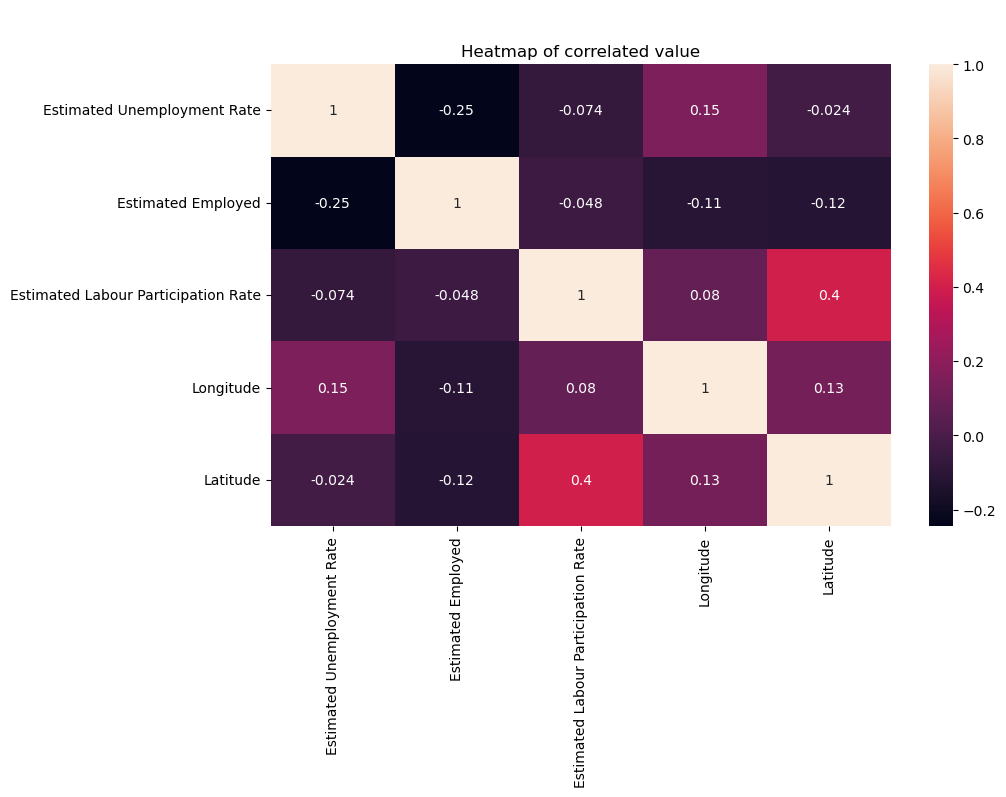

In [15]:
# Generating heatmap from correlation matrix
fig,ax=plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(),annot=True).set(title="\n\nHeatmap of correlated value")
plt.show()

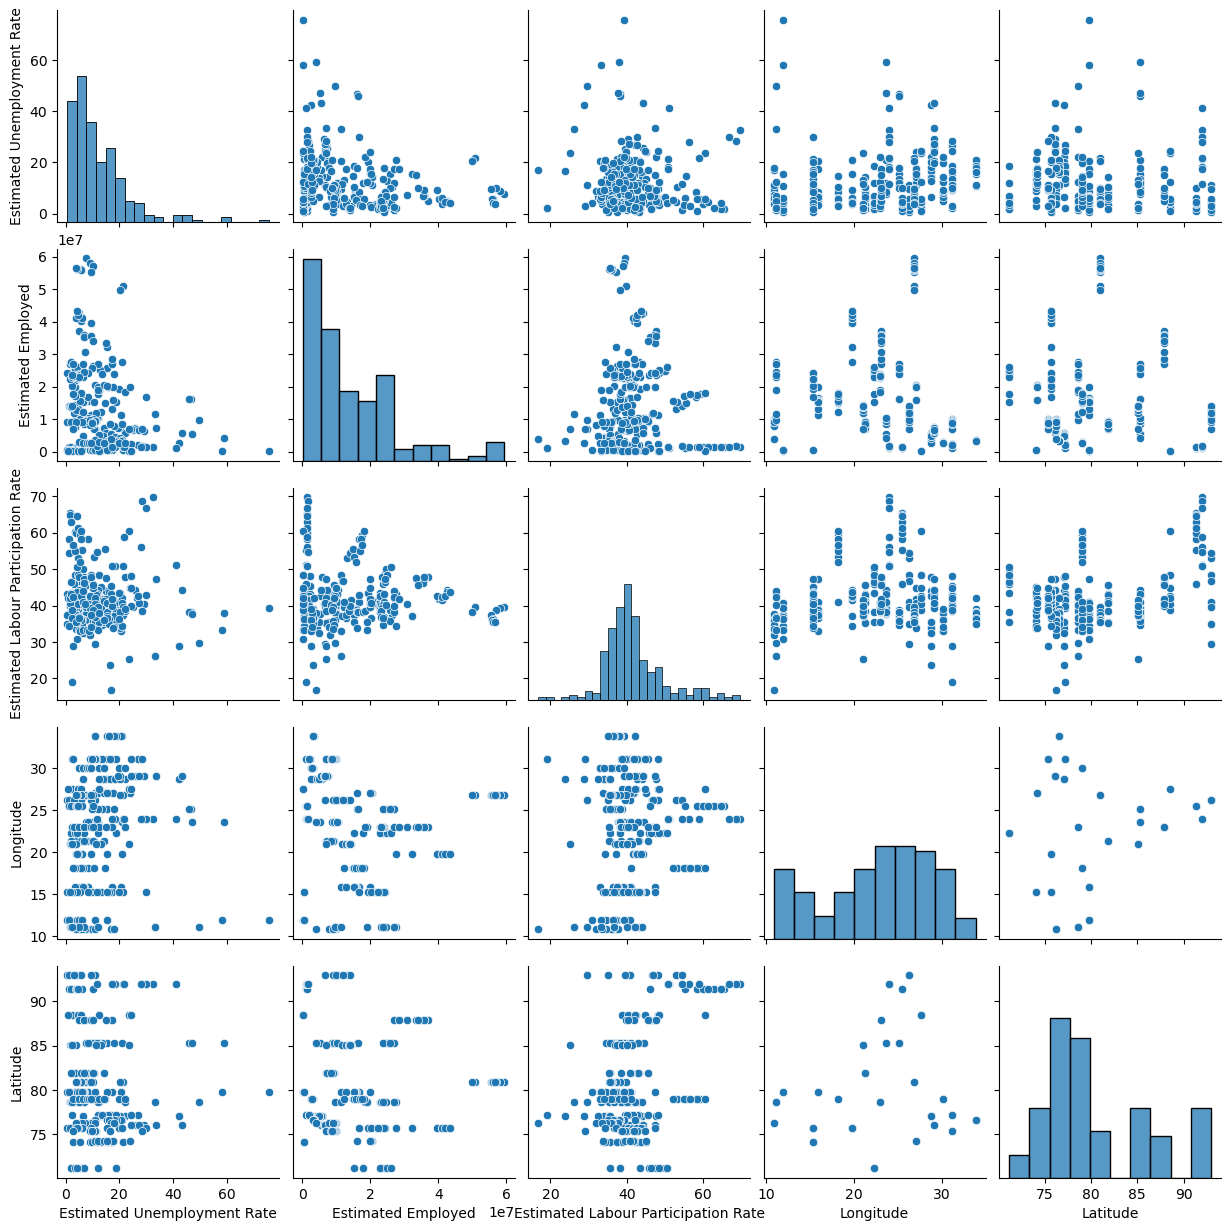

In [16]:
sns.pairplot(df)

In [17]:
plot_ump = df[['Estimated Unemployment Rate','States']]

df_unemp = plot_ump.groupby('States').mean().reset_index()

df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')

fig = px.bar(df_unemp, x='States',y='Estimated Unemployment Rate',color='States',
            title='Average Unemployment Rate in each state',template='plotly')

fig.show()

In [18]:
#The below box shows unemployement rate in each state in India
fig = px.box(df,x='States',y='Estimated Unemployment Rate',color='States',title='Unemployment rate',template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [19]:
fg = px.histogram(df,x='States',y='Estimated Unemployment Rate',color='Region',title='Unemployment rate(State wise)',template='plotly')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()

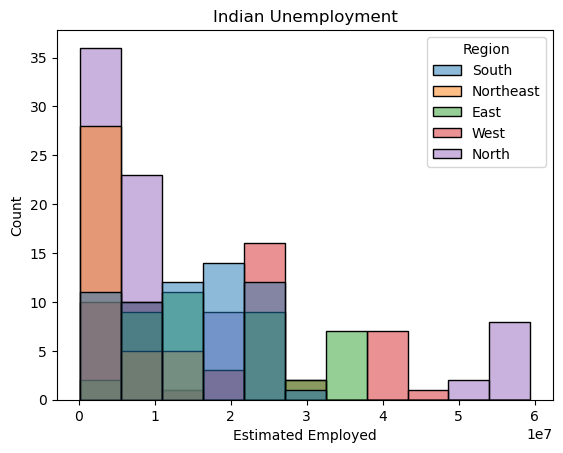

In [20]:
df.columns =["States", "Date", "Frequency", "Estimated Unemployment Rate", "Estimated Employed", "Estimated Labour Participation Rate", "Region", "Longitude","Latitude"]
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed",hue="Region",data=df)
plt.show()

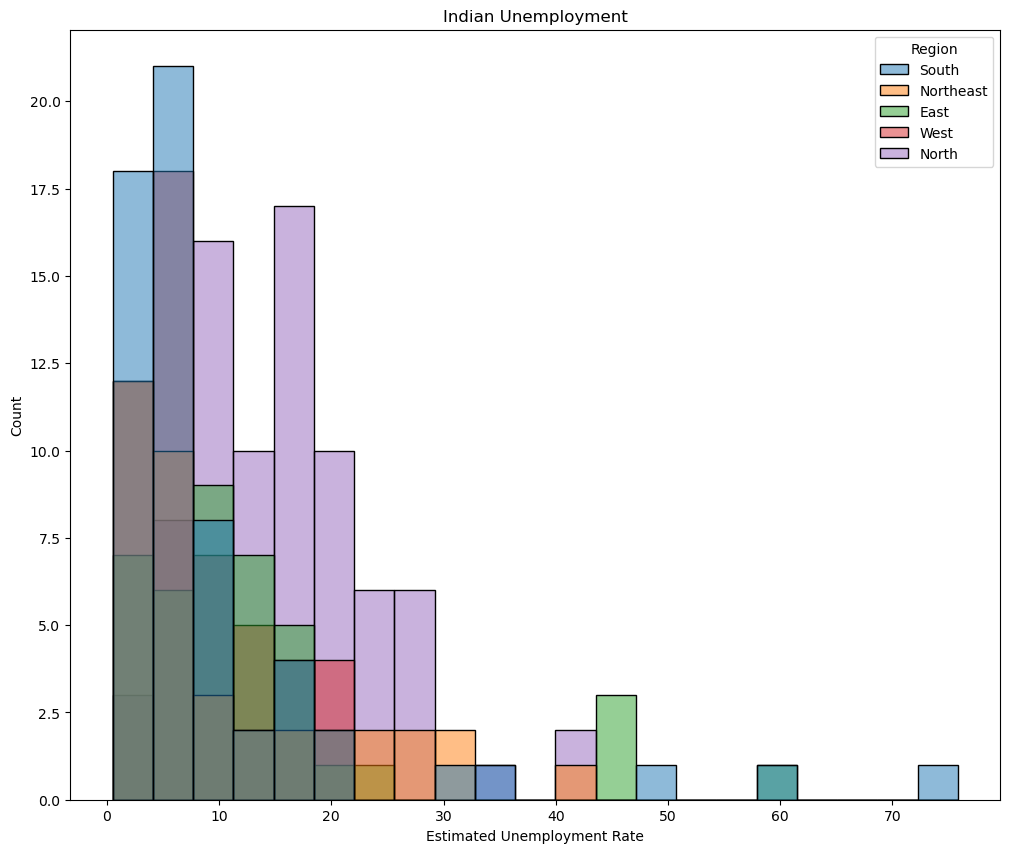

In [21]:
# Unemployment rate according to different regions of India
plt.figure(figsize=(12,10))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate",hue="Region",data=df)
plt.show()

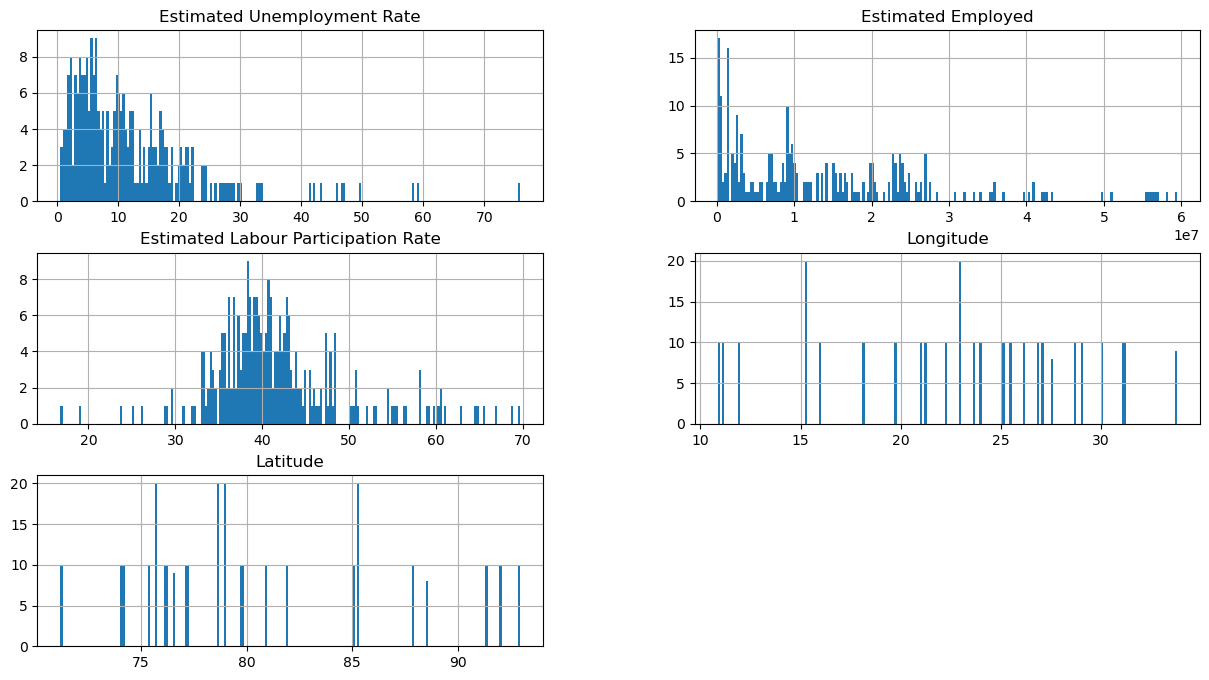

In [22]:
df.hist(bins=200,figsize=[15,8])
plt.show()

In [23]:
count_by_region=df['Region'].value_counts().rename_axis('State').reset_index(name='Count')
count_by_region.style.background_gradient(cmap='Blues')

<Axes: xlabel='count', ylabel='Region'>

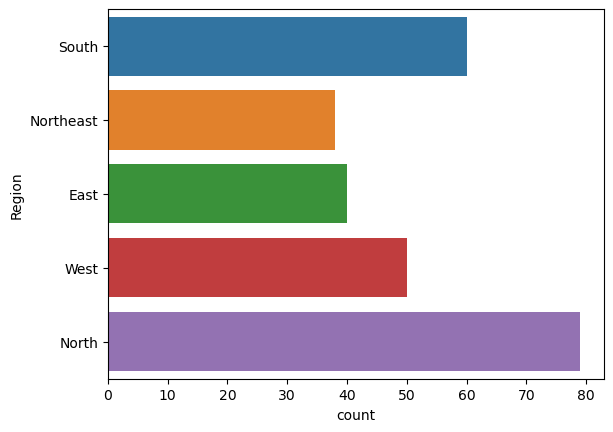

In [24]:
sns.countplot(y='Region',data=df)

In [25]:
unemployment = df[["States","Region","Estimated Unemployment Rate"]]
figure = px.sunburst(unemployment,path=["Region","States"],
                     values="Estimated Unemployment Rate",
                     width = 700,height=700, color_continuous_scale="RdY1Gn", 
                     title="Unemployment Rate in Indian")
figure.show()

Text(0.5, 1.0, 'Indian Unemployment')

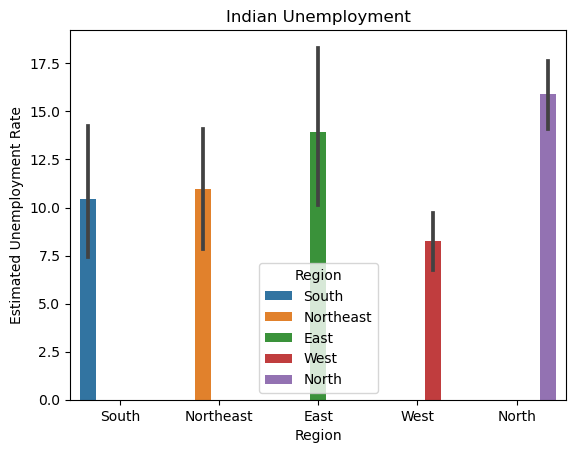

In [26]:
sns.barplot(x="Region",y="Estimated Unemployment Rate",hue="Region",data=df)
plt.title("Indian Unemployment")

In [27]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [28]:
df['Frequency']= df['Frequency'].astype('category')

In [29]:
df['Month'] =  df['Date'].dt.month

In [30]:
df['Month_int'] = df['Month'].apply(lambda x : int(x))

In [31]:
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])

In [32]:
df['Region'] = df['Region'].astype('category')

In [33]:
fig = px.bar(df, x='Region',y='Estimated Unemployment Rate',animation_frame = 'Month_name',color='States',
            title='Unemployment rate across region from Jan.2020 to Oct.2020', height=700,template='plotly')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.show()

In [34]:
fig = px.scatter_matrix(df,template='plotly',
    dimensions=['Estimated Unemployment Rate','Estimated Employed',
                'Estimated Labour Participation Rate'],
    color='Region')
fig.show()

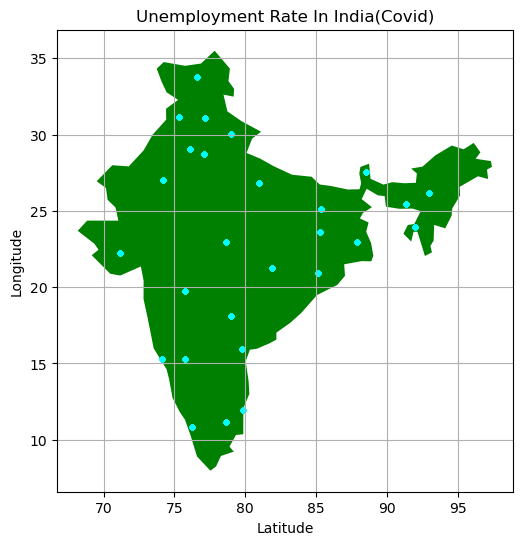

In [35]:
import geopandas as gpd
# initialize an axis
fig, ax = plt.subplots(figsize=(8, 6))
# plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "India"].plot(color="green", ax=ax)
# parse dates for plot's title
first_month = df["Estimated Employed"].min()
last_month = df["Estimated Employed"].max()

region_df = df.groupby('Region').sum()
# plot points
df.plot(x="Latitude", y="Longitude", kind="scatter",
        title=f"Unemployment Rate In India(Covid)",
        ax=ax, s=10,color='cyan')

ax.grid(visible=True, alpha=1)
plt.show()


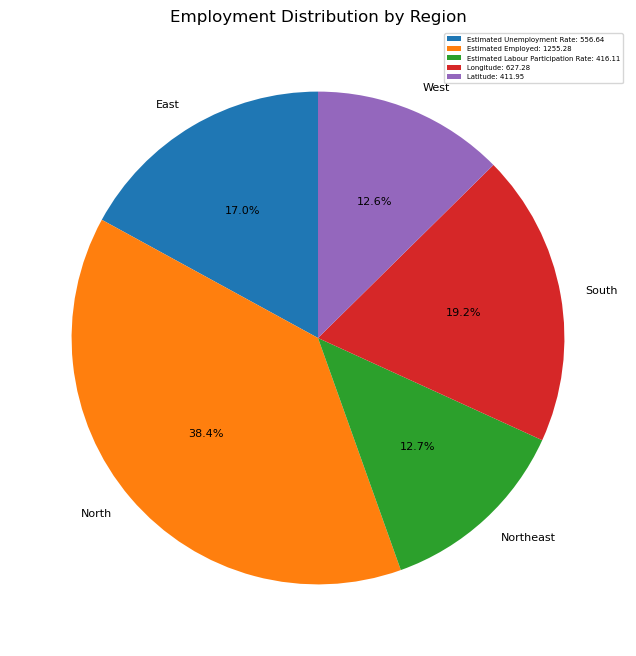

In [36]:
region_df = df.groupby('Region').sum()
fig, ax = plt.subplots(figsize=(20, 8))
ax.pie(region_df['Estimated Unemployment Rate'], labels=region_df.index, autopct='%1.1f%%', startangle=90,textprops={'fontsize':8})
ax.legend(loc='upper right', labels=[f'{l}: {s}' for l, s in zip(region_df, region_df['Estimated Unemployment Rate'])], prop={'size': 5})
ax.set_title('Employment Distribution by Region')
plt.show()

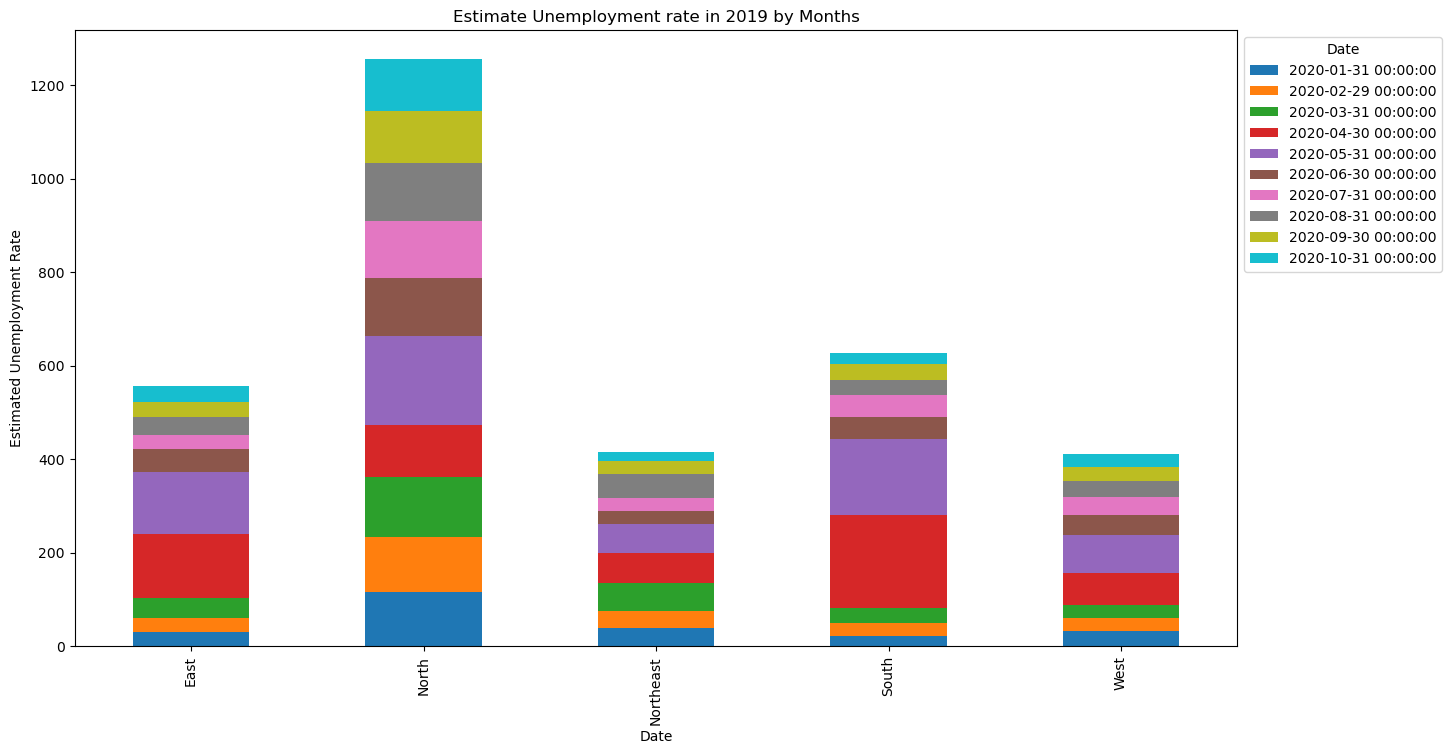

In [37]:
# Group data by region and date
grouped_df = df.groupby(["Region","Date"]).sum()

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(15,8))
grouped_df["Estimated Unemployment Rate"].unstack().plot.bar(stacked=True, ax=ax)

# Label the plot
ax.set_ylabel("Estimated Unemployment Rate")
ax.set_xlabel("Date")
plt.title('Estimate Unemployment rate in 2019 by Months')

# Arrange legend to the right upper corner
ax.legend(title="Date", loc='upper left', bbox_to_anchor=(1,1))

# Show plot
plt.show()

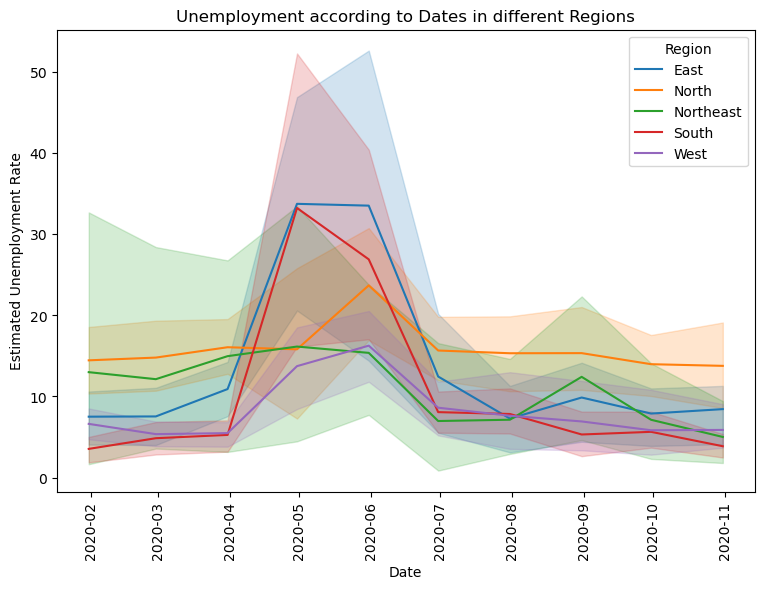

In [38]:
fig = plt.figure(figsize = (9, 6))
sns.lineplot(y="Estimated Unemployment Rate", data=df, x='Date',hue="Region")
plt.title("Unemployment according to Dates in different Regions")
plt.xticks(rotation=90)
plt.show()

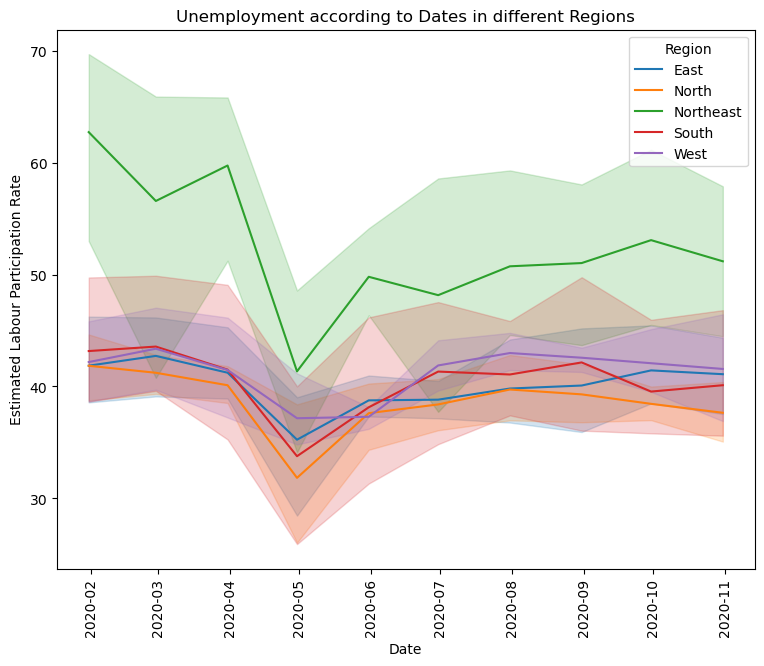

In [39]:
fig = plt.figure(figsize = (9, 7))
sns.lineplot(y="Estimated Labour Participation Rate", data=df, x='Date',hue="Region")
plt.title("Unemployment according to Dates in different Regions")
plt.xticks(rotation=90)
plt.show()

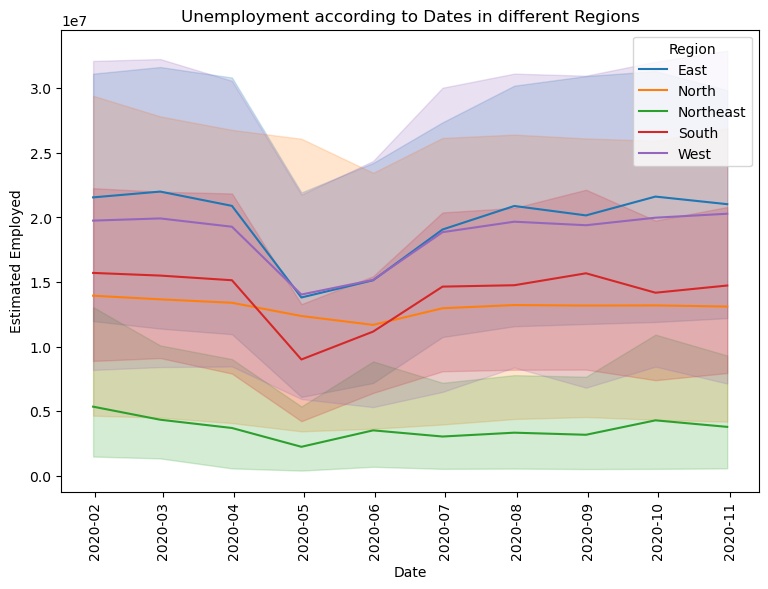

In [40]:
fig = plt.figure(figsize = (9, 6))
sns.lineplot(y="Estimated Employed", data=df, x='Date',hue="Region")
plt.title("Unemployment according to Dates in different Regions")
plt.xticks(rotation=90)
plt.show()